In [1]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.feature_selection import chi2 
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# Handling warnings as errors 
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Reading dataset
data=pd.read_csv("C:/Users/79bar/dsc_680/yield_df.csv")
df_yield=pd.DataFrame(data)
print("The loading of the dataset was successful.\n")

The loading of the dataset was successful.



In [7]:
df_yield.head() # Reading the first records by using the head() metho

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


### Data exploration

In [8]:
df_yield.shape # Returning a tuple representing the dimensionality of the DataFrame

(28242, 8)

In [9]:
df_yield.size # Returning an int representing the number of elements in this object

225936

In [10]:
df_yield.info() # Printing a summary of the dataframe, index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  int64  
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [11]:
df_yield.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [12]:
df_yield.describe() # looking at the statistical summary of the variables with describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


### Data cleaning

In [14]:
df_yield.isnull().any() # Checking missing data

Unnamed: 0                       False
Area                             False
Item                             False
Year                             False
hg/ha_yield                      False
average_rain_fall_mm_per_year    False
pesticides_tonnes                False
avg_temp                         False
dtype: bool

In [16]:
df_yield.duplicated() # Finding duplicate value in the data 

0        False
1        False
2        False
3        False
4        False
         ...  
28237    False
28238    False
28239    False
28240    False
28241    False
Length: 28242, dtype: bool

In [15]:
df_yield.isnull().sum() # Detecting missing value using interger

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

### Data visualization

[Text(0.5, 0, 'Visa application year'),
 Text(0, 0.5, 'Number of Visa applicatons')]

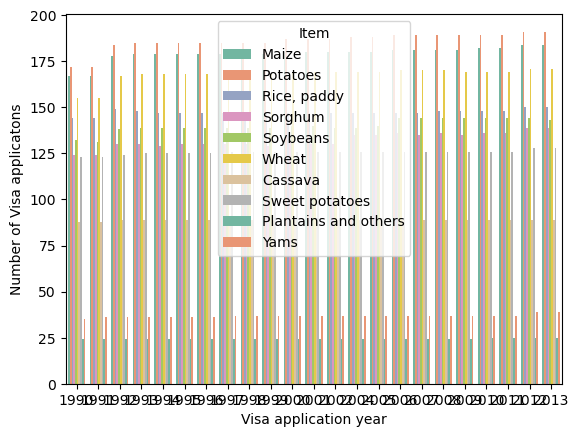

In [17]:
# Counting plot along y axis
fig, ax = plt.subplots()
sns.countplot(x="Year", hue = "Item", palette = "Set2",data = df_yield)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons') 

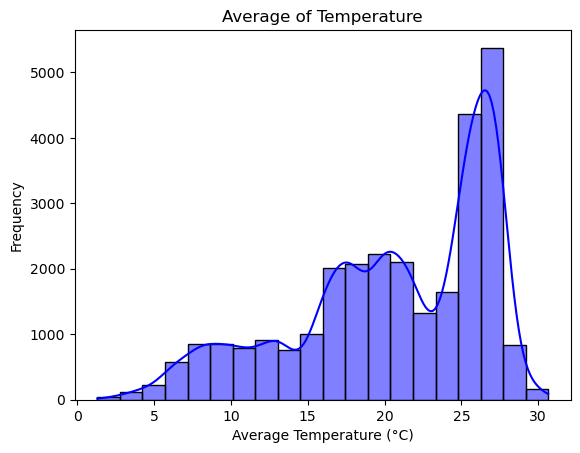

In [28]:
# Display avg_temp 
plt.figure()
sns.histplot(df_yield['avg_temp'], bins=20, kde=True, color='b')
plt.title('Average of Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

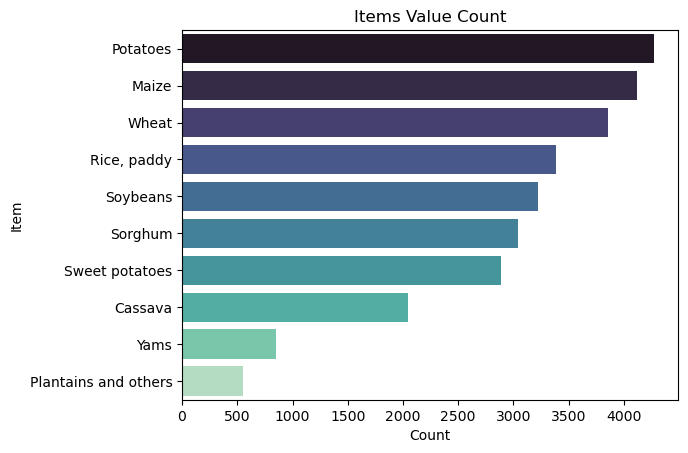

In [24]:
# Display "Item" using barplot
plt.figure()
item_value= df_yield['Item'].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette='mako')
plt.title('Items Value Count')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

<AxesSubplot:>

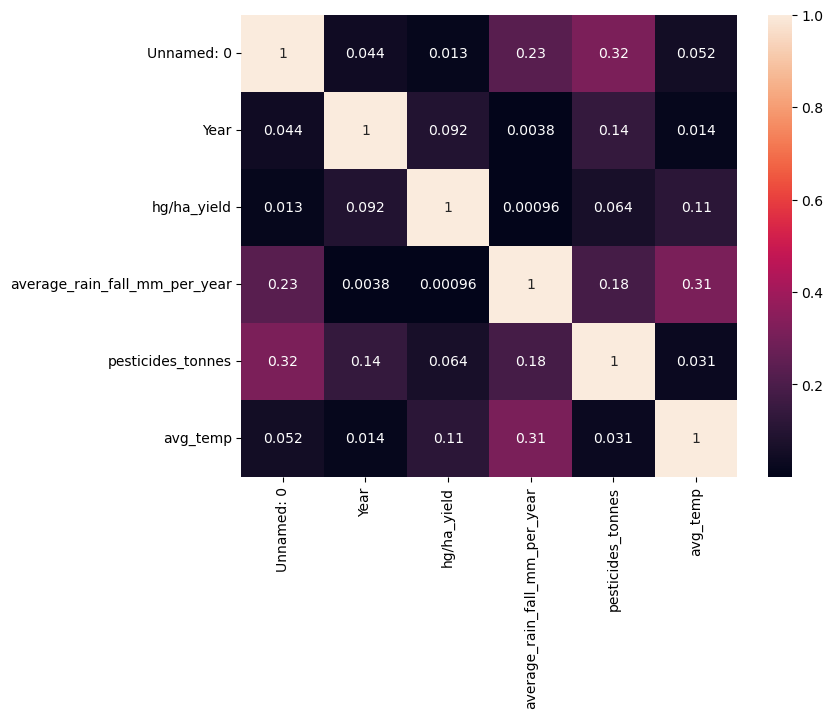

In [31]:
corr_Mat=df_yield.corr().abs()
plt.figure(figsize=(8,6))
sns.heatmap(corr_Mat,annot=True) #

In [32]:
# Drop the index column if it's not needed
yield_clean= df_yield.drop(columns=["Unnamed: 0"])

In [33]:
yield_clean.head(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


### Deal with inconsistent  values

In [35]:
# Converting categorical data into dummy or indicator variables
yield_clean_dummies =pd.get_dummies(yield_clean, columns=['Area','Item'],drop_first=True)
yield_clean_dummies.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Area_Zimbabwe,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485,121.0,16.37,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,66667,1485,121.0,16.37,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,23333,1485,121.0,16.37,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,12500,1485,121.0,16.37,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,7000,1485,121.0,16.37,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
# Creating features and target
X=yield_clean_dummies.drop(['hg/ha_yield'],axis=1)
y=yield_clean_dummies['hg/ha_yield']

In [39]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**1-** Training the model by using **Linear Regression**

In [ ]:
# Creating an instance of the LinearRegression class called lr
lr= LinearRegression()
# Fitting the model to the data
lr.fit(X_train, y_train)